In [168]:
# Get FTSE100 index back from 01-Jan-1999
import html5lib
base_url = 'https://www.google.com/finance/historical?cid=12590587&startdate=Jan%201%2C%201999&' + \
            'enddate=Oct%2015%2C%202016&num=200&ei=qVQCWMmRHMf7UKqMn7AM&start='
ftse = pd.DataFrame()
for page in range(0,85,200):  #4485
    url = base_url + str(page)
    print('getting- ', url[:50] + '...' + url[110:])
    ftse = ftse.append(pd.read_html(url, flavor='html5lib', attrs={'class': 'gf-table historical_price'}, 
                                    parse_dates=[0], header=0)[0])
ftse.set_index('Date')

getting-  https://www.google.com/finance/historical?cid=1259...num=200&ei=qVQCWMmRHMf7UKqMn7AM&start=0


In [182]:
ftse.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-14,6977.740,7055.180,6977.740,7013.550,-
2016-10-13,7024.010,7024.010,6930.040,6977.740,-
2016-10-12,7070.880,7079.420,7015.760,7024.010,-
2016-10-11,7097.500,7129.830,7061.360,7070.880,-
2016-10-10,7044.390,7104.490,7024.080,7097.500,-


In [56]:
%matplotlib inline
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
np.set_printoptions(supress=True) 
pd.set_option('display.float_format', lambda x: '%.4f' % x)

barclays = quandl.get("GOOG/LON_BARC", authtoken="TMMe4w92TaVmnEgC1D6z")
barclays['Gain'] = barclays['Close'] - barclays['Open']
barclays['Day'] = barclays.index.dayofweek
barclays = barclays[(barclays.Volume!=0) & (barclays.Day!=5)]
barclays.head()

,Open,High,Low,Close,Volume,Gain,Day
Date,,,,,,,
1999-01-04,322.0,328.00,319.0,323.0,38524204.0,1.0,0
1999-01-05,322.5,338.25,320.5,326.0,22667444.0,3.5,1
1999-01-06,342.0,361.20,340.0,356.9,33591692.0,14.9,2
1999-01-07,354.1,357.20,325.0,351.9,65948960.0,-2.2,3
1999-01-08,359.0,369.00,334.0,368.0,28346880.0,9.0,4


In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
barclays.Close.plot()
ftse.Close.plot()

C:\Users\Graham\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


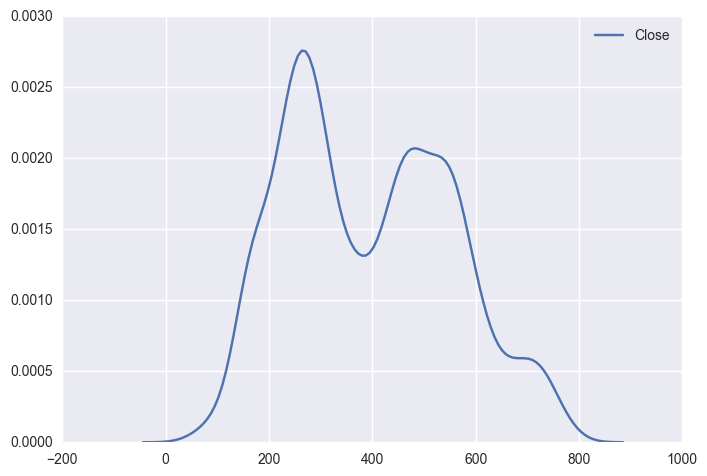

In [4]:
sns.kdeplot(barclays['Close']);

C:\Users\Graham\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


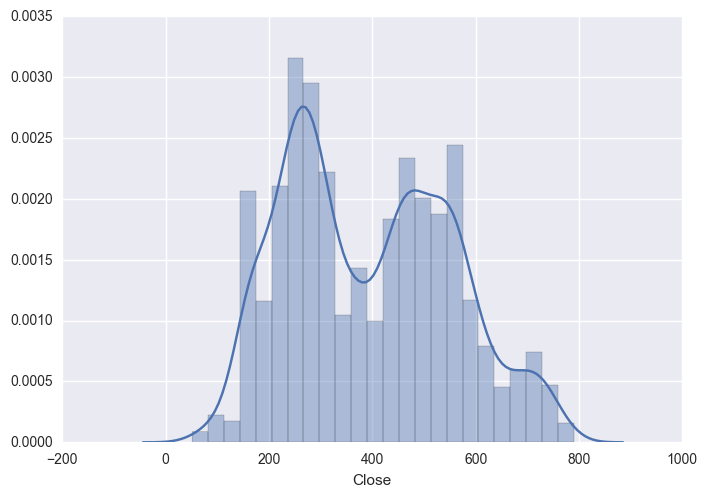

In [5]:
sns.distplot(barclays['Close'])

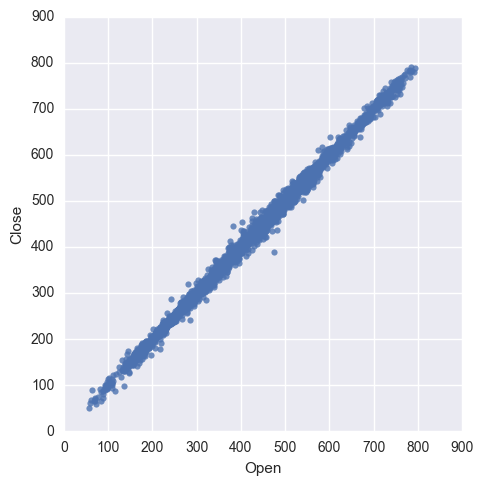

In [6]:
sns.lmplot('Open', 'Close', data=barclays, fit_reg=False)

In [67]:
barclays_gr = barclays.groupby('Day')

In [75]:
barclays_gr.Gain.mean()

Day
0   -0.508
1    0.054
2    0.126
3   -0.401
4   -0.316
Name: Gain, dtype: float64

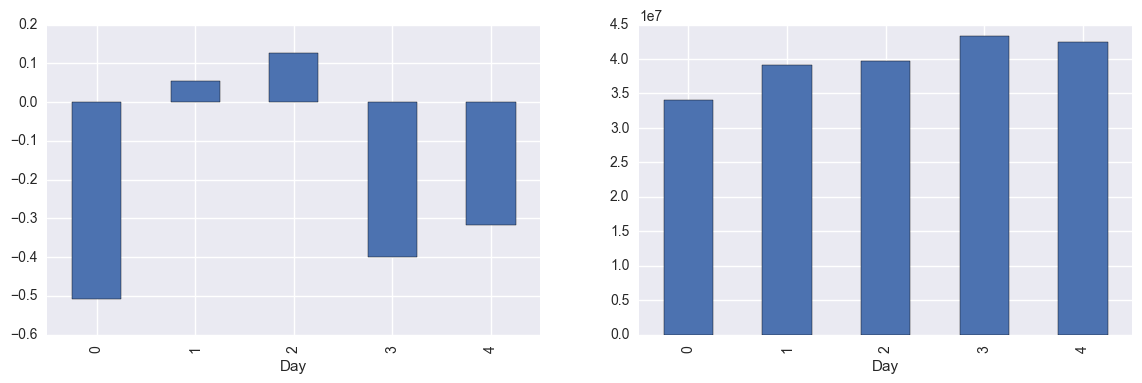

In [109]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
barclays_gr.Gain.mean().plot(kind='bar')
plt.subplot(1,2,2)
barclays_gr.Volume.mean().plot(kind='bar')

In [116]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)
f1 = web.DataReader("GOOG", 'yahoo', start, end)
#f2 = web.DataReader("INDEXFTSE:UKX", 'google', start, end)

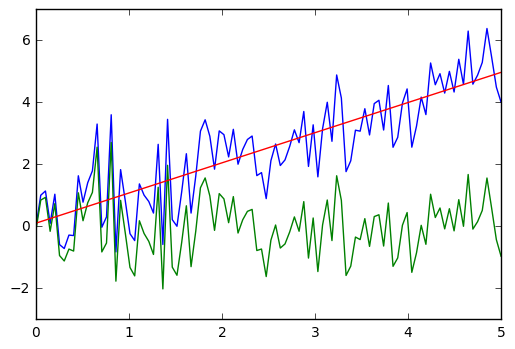

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)
xde = signal.detrend(x)
diff = x - xde

plt.plot(t, x, linewidth=1) 
plt.plot(t, xde, linewidth=1) 
plt.plot(t, diff, linewidth=1)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import requests
import time
import datetime as dt
from IPython.display import display
from ipywidgets import widgets

def get_price(ticker):
    resp = requests.get(r"http://finance.yahoo.com/webservice/v1/symbols/{}/quote?format=json" \
                            .format(ticker), headers={'User-Agent': 'Mozilla/5.0'}).json()
    return float(resp['list']['resources'][0]['resource']['fields']['price'])

def animate(frame):
    global x, y
    x.append( dt.datetime.now() )
    price = get_price(ticker)
    y.append( price)
    ax.set_xlim([max(x) - dt.timedelta(seconds=65), max(x)])
    ax.set_ylim([min(y) * 0.99999, max(y) * 1.00001])
    line.set_data(x, y)
    message = '{} {}'.format(ticker, price)
    widget.value = '<h4>{} => {}</h4>'.format(dt.datetime.now(), message)
    time.sleep(2)
    return line,

ticker = 'GBPUSD=X'
fig = plt.figure(num='Yahoo Finance Ticker: '+ticker)
ax = plt.axes()
ax.grid(True)
ax.get_yaxis().get_major_formatter().set_useOffset(False)
fig.autofmt_xdate()
time_locator = mdates.SecondLocator(interval=5)
time_fmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_locator(time_locator)
ax.xaxis.set_major_formatter(time_fmt)
line, = ax.plot([], [], lw=1)

x=[]
y=[]
widget = widgets.HTML(value='')
display(widget)

anim = animation.FuncAnimation(fig, animate, repeat=False, frames=30, interval=50, blit=False)
plt.show()